In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('homeprices.csv')
data.head()

,area,bedrooms,price
0,7420,4,13300000
1,8960,4,12250000
2,9960,3,12250000
3,7500,4,12215000
4,7420,4,11410000


In [3]:
#firstly we take only area and prices into consideration

In [4]:
# so dropping column bedrooms

In [5]:
data=data.drop('bedrooms',axis=1)

In [6]:
data.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [7]:
def loss_fun(m,b,points):
    total_error=0
    for i in range (len(points)):
        x=points.iloc[i].area
        y=points.iloc[i].price
        total_error+=(y-(m*x+b))**2
    total_error=total_error/len(points)
    

In [8]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'data' with columns 'area' and 'price'
# Perform feature scaling
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [9]:
def gradient_descent(m_now,b_now,points,l):
    m_gradient=0
    b_gradient=0
    n=len(points)
    for i in range(n):
        x=points.iloc[i].area
        y=points.iloc[i].price
        m_gradient+=-(2/n)*x*(y-(m_now*x+b_now))
        b_gradient+=-(2/n)*(y-(m_now*x+b_now))
    m=m_now-m_gradient*l
    b=b_now-b_gradient*l
    return m, b

Final parameters: 0.526219454277595 2.607098564810774e-16


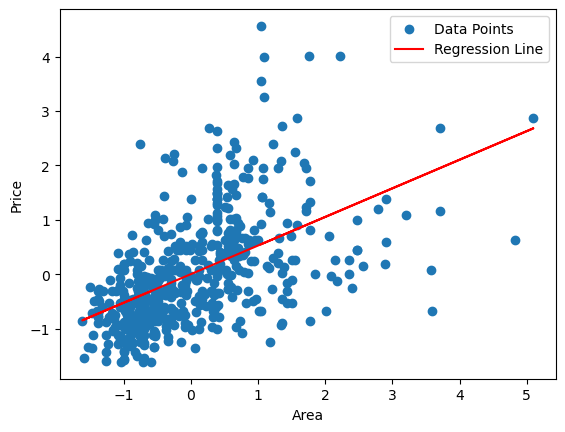

In [12]:
m = 0
b = 0
l = 0.001
epochs = 2000
for i in range(epochs):
    m, b = gradient_descent(m, b, data_scaled, l)

# Print the final parameters
print("Final parameters:", m, b)

# Plotting the scatter plot
plt.scatter(data_scaled.area, data_scaled.price, label='Data Points')

# Plotting the regression line
x_values = data_scaled.area
y_values = m * x_values + b
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Adding labels and legend
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
